In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [7]:
# Cell 1: setup & imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import joblib  # to save models

sns.set(style="whitegrid")
print("Imports done.")


Imports done.


In [8]:

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")

print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("\nFirst five rows:")
display(X.head())
print("\nTarget distribution:")
display(y.value_counts())

# optional: combine into one df for convenience
df = pd.concat([X, y], axis=1)
df['target_name'] = df['target'].map(lambda t: iris.target_names[t])
display(df.head())


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First five rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Target distribution:


target
0    50
1    50
2    50
Name: count, dtype: int64

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

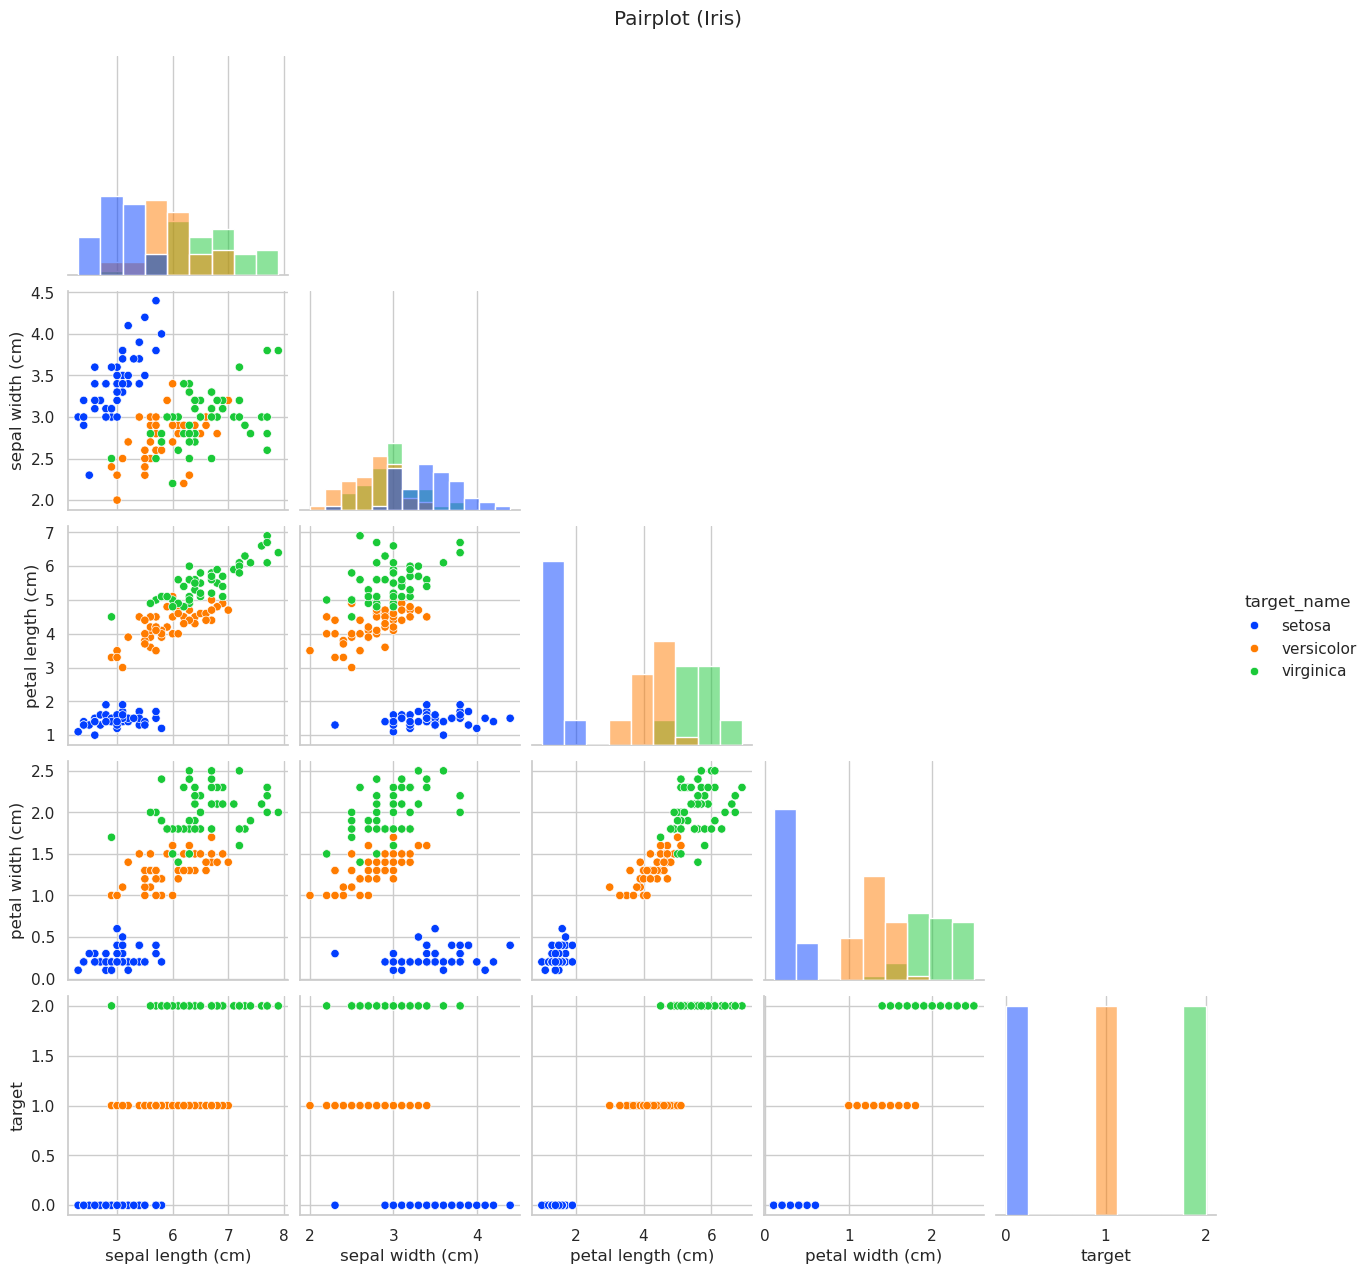

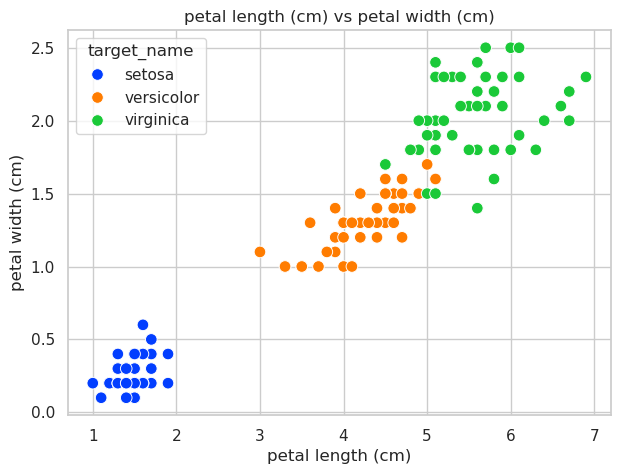

In [10]:
# Cell 3: EDA - pairplot and 2D scatter (petal length vs petal width)
sns.pairplot(df, hue='target_name', corner=True, diag_kind='hist', palette='bright')
plt.suptitle("Pairplot (Iris)", y=1.02)
plt.show()

# 2D scatter focusing on two most separable features
feat_x = 'petal length (cm)'
feat_y = 'petal width (cm)'

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x=feat_x, y=feat_y, hue='target_name', palette='bright', s=70)
plt.title(f"{feat_x} vs {feat_y}")
plt.show()


In [11]:
# Cell 4: train-test split and scale features
# We'll use only two features for visualization plots (petal length & petal width),
# but we also show how to use all features for model training.
USE_2D = True  # set False to use all 4 features

if USE_2D:
    X_use = X[[feat_x, feat_y]].values
else:
    X_use = X.values

X_train, X_test, y_train, y_test = train_test_split(X_use, y.values, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (112, 2) Test shape: (38, 2)


Linear SVM accuracy: 0.9210526315789473

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



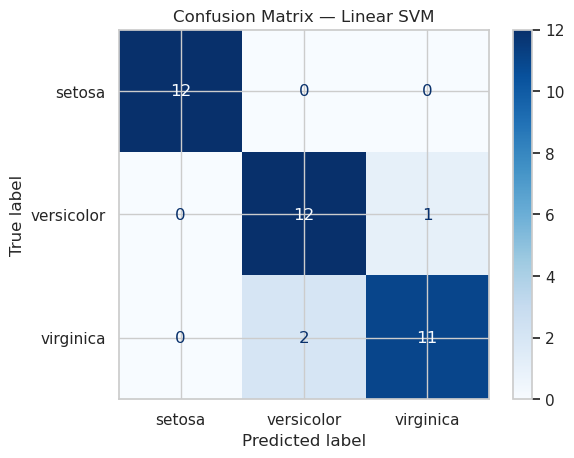

In [12]:
# Cell 5: Train and evaluate Linear SVM
clf_linear = SVC(kernel='linear', C=1.0, probability=False, random_state=42)
clf_linear.fit(X_train_scaled, y_train)
y_pred = clf_linear.predict(X_test_scaled)

print("Linear SVM accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=iris.target_names, cmap='Blues')
plt.title("Confusion Matrix — Linear SVM")
plt.show()


RBF SVM accuracy: 0.9210526315789473

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



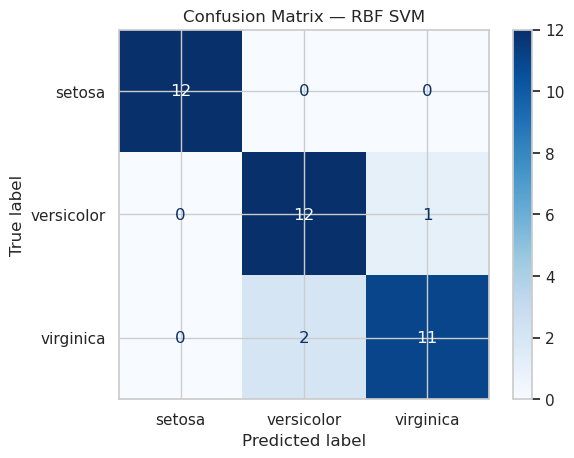

In [13]:
# Cell 6: Train and evaluate RBF SVM
clf_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=False, random_state=42)
clf_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = clf_rbf.predict(X_test_scaled)

print("RBF SVM accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification report:\n", classification_report(y_test, y_pred_rbf, target_names=iris.target_names))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rbf, display_labels=iris.target_names, cmap='Blues')
plt.title("Confusion Matrix — RBF SVM")
plt.show()


Polynomial SVM accuracy: 0.9210526315789473

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.81      1.00      0.90        13
   virginica       1.00      0.77      0.87        13

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38



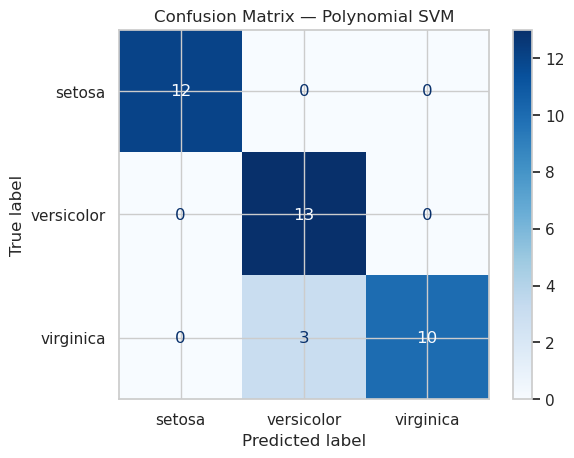

In [14]:
# Cell 7: Polynomial kernel SVM (degree=3)
clf_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', probability=False, random_state=42)
clf_poly.fit(X_train_scaled, y_train)
y_pred_poly = clf_poly.predict(X_test_scaled)

print("Polynomial SVM accuracy:", accuracy_score(y_test, y_pred_poly))
print("\nClassification report:\n", classification_report(y_test, y_pred_poly, target_names=iris.target_names))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_poly, display_labels=iris.target_names, cmap='Blues')
plt.title("Confusion Matrix — Polynomial SVM")
plt.show()


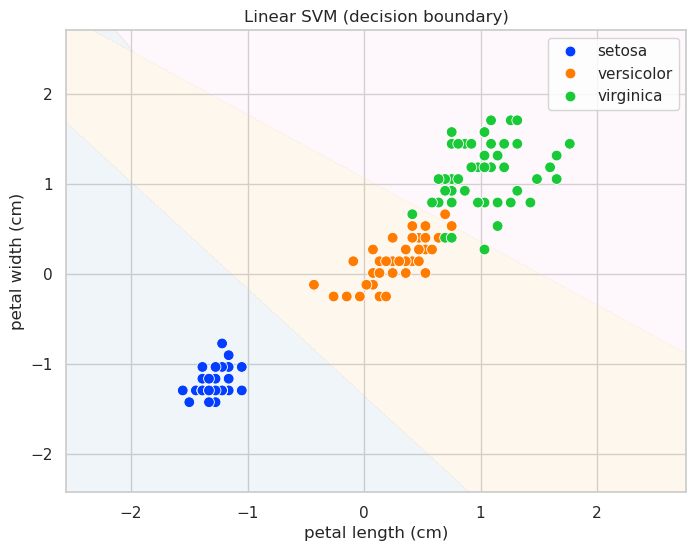

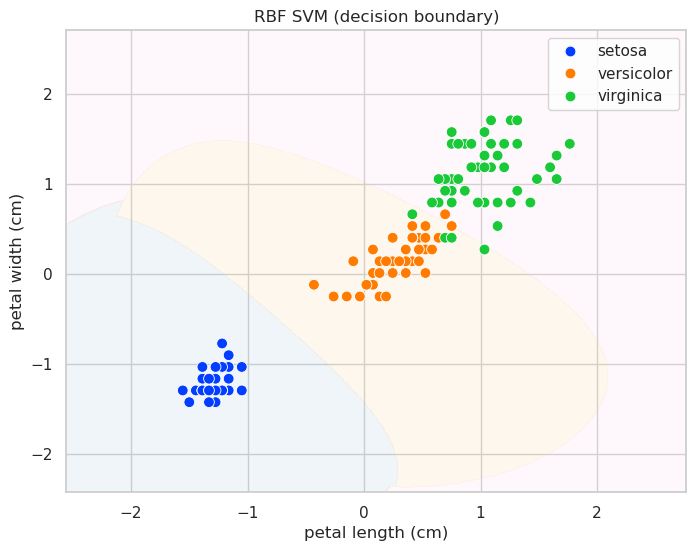

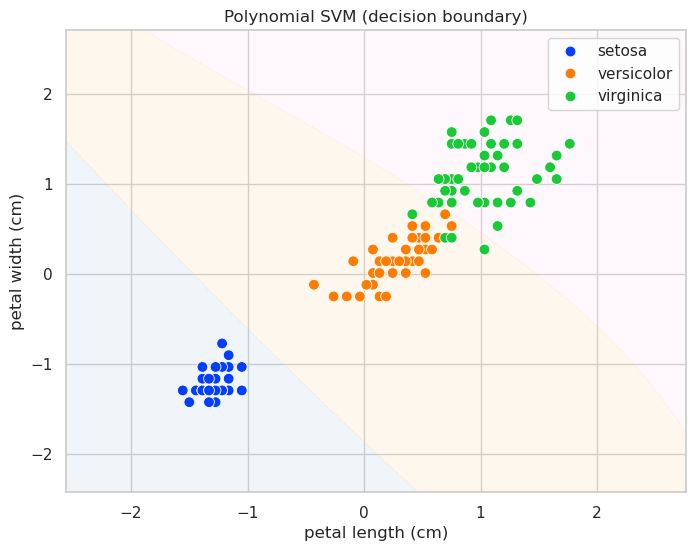

In [15]:
# Cell 8: utility to plot decision boundary for 2D features
def plot_decision_boundary(clf, X_scaled, y_true, title="Decision Boundary", feature_names=(feat_x, feat_y)):
    # clf should be trained and expect scaled 2D inputs
    x_min, x_max = X_scaled[:,0].min() - 1, X_scaled[:,0].max() + 1
    y_min, y_max = X_scaled[:,1].min() - 1, X_scaled[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(grid)
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.2, levels=np.arange(-0.5, 3, 1), cmap='Pastel1')
    sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=[iris.target_names[int(i)] for i in y_true], palette='bright', s=60)
    plt.xlabel(feature_names[0]); plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()

# Plot boundaries for the three classifiers (only if using 2D)
if USE_2D:
    plot_decision_boundary(clf_linear, scaler.transform(X_use), np.array(y), title="Linear SVM (decision boundary)")
    plot_decision_boundary(clf_rbf, scaler.transform(X_use), np.array(y), title="RBF SVM (decision boundary)")
    plot_decision_boundary(clf_poly, scaler.transform(X_use), np.array(y), title="Polynomial SVM (decision boundary)")
else:
    print("Decision boundary plots require 2D features (set USE_2D = True).")


Best params: {'C': 1, 'gamma': 0.1}
Best CV score: 0.9731225296442687


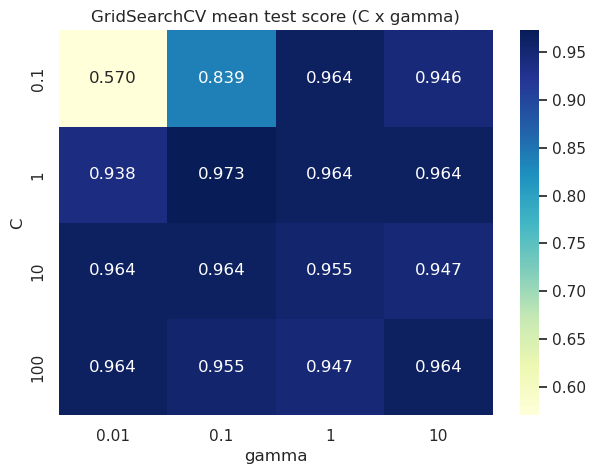

Test accuracy of best estimator: 0.9210526315789473
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [16]:
# Cell 9: Grid search over C and gamma for RBF kernel (quick)
# Note: do this on the scaled training set; small grid for speed.
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.01, 0.1, 1, 10]
}
grid = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

# create heatmap of mean test scores
scores = grid.cv_results_['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.figure(figsize=(7,5))
sns.heatmap(scores, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], fmt=".3f", cmap="YlGnBu")
plt.xlabel("gamma")
plt.ylabel("C")
plt.title("GridSearchCV mean test score (C x gamma)")
plt.show()

# Evaluate best estimator on test set
best = grid.best_estimator_
y_best = best.predict(X_test_scaled)
print("Test accuracy of best estimator:", accuracy_score(y_test, y_best))
print(classification_report(y_test, y_best, target_names=iris.target_names))


In [17]:
# Cell 10: save models to disk
joblib.dump(best, "svm_rbf_best.joblib")
joblib.dump(scaler, "scaler.joblib")
print("Saved best model and scaler to disk: svm_rbf_best.joblib, scaler.joblib")


Saved best model and scaler to disk: svm_rbf_best.joblib, scaler.joblib


In [18]:
# Cell 11: Predict a single example (use scaled inputs)
# Example: use the first test sample
sample = X_test[0].reshape(1, -1)
sample_scaled = scaler.transform(sample)
print("Raw sample:", sample)
print("Scaled sample:", np.round(sample_scaled, 3))
print("Predicted class (best model):", iris.target_names[best.predict(sample_scaled)[0]])
print("True class:", iris.target_names[y_test[0]])


Raw sample: [[1.3 0.2]]
Scaled sample: [[-1.388 -1.296]]
Predicted class (best model): setosa
True class: setosa


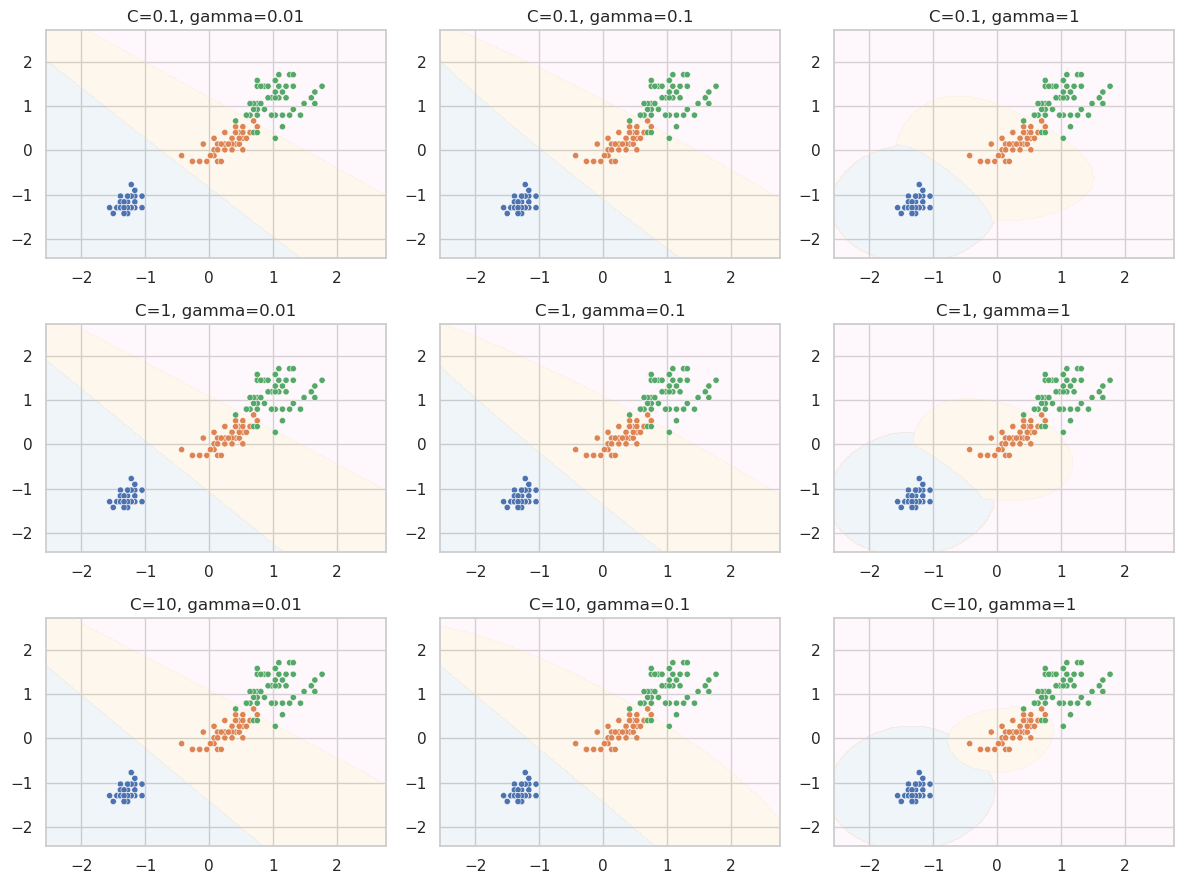

In [19]:
# Cell 12: optional — visualize effect of gamma and C by looping small sets (2D only)
if USE_2D:
    Cs = [0.1, 1, 10]
    gammas = [0.01, 0.1, 1]
    plt.figure(figsize=(12, 9))
    idx = 1
    for C in Cs:
        for g in gammas:
            svc = SVC(kernel='rbf', C=C, gamma=g).fit(scaler.transform(X_use), y)
            plt.subplot(len(Cs), len(gammas), idx)
            x_min, x_max = scaler.transform(X_use)[:,0].min()-1, scaler.transform(X_use)[:,0].max()+1
            y_min, y_max = scaler.transform(X_use)[:,1].min()-1, scaler.transform(X_use)[:,1].max()+1
            xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
            Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
            plt.contourf(xx, yy, Z, alpha=0.2, levels=np.arange(-0.5,3,1), cmap='Pastel1')
            sns.scatterplot(x=scaler.transform(X_use)[:,0], y=scaler.transform(X_use)[:,1], hue=[iris.target_names[i] for i in y], s=20, legend=False)
            plt.title(f"C={C}, gamma={g}")
            idx += 1
    plt.tight_layout()
    plt.show()
else:
    print("Enable USE_2D at top to run this visualization.")


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train SVC (RBF is default and most commonly used)
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_svc = svc_model.predict(X_test_scaled)

# Evaluate accuracy
print("SVC Test Accuracy:", accuracy_score(y_test, y_pred_svc))

# Detailed classification metrics
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_svc, target_names=iris.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title("SVC – Confusion Matrix")
plt.show()
